<a href="https://colab.research.google.com/github/vivek201102/ML-Labs/blob/master/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

# Data for weather
outlook = np.array([
      'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny'
     ])


wind = np.array([
        'False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'
      ])

temperature = np.array([
      'Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'
    ])

humidity = np.array([
    'High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High'
])

play = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'
])


# Preprocessing

le = preprocessing.LabelEncoder()

outlook_le = le.fit_transform(outlook)
outlook_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

wind_le = le.fit_transform(wind)
wind_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

temperature_le = le.fit_transform(temperature)
temp_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

humidity_le = le.fit_transform(humidity)
humidity_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

play_le = le.fit_transform(play)
play_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))

dataset = zip(outlook_le, temperature_le, humidity_le, wind_le)
data = np.array(tuple(dataset))


classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(data, play_le)

print(outlook_mapping)
print(temp_mapping)
print(humidity_mapping)
print(wind_mapping)

classifier.predict([[1,0,1,1]])


{'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
{'Cool': 0, 'Hot': 1, 'Mild': 2}
{'High': 0, 'Normal': 1}
{'False': 0, 'True': 1}


array([0])

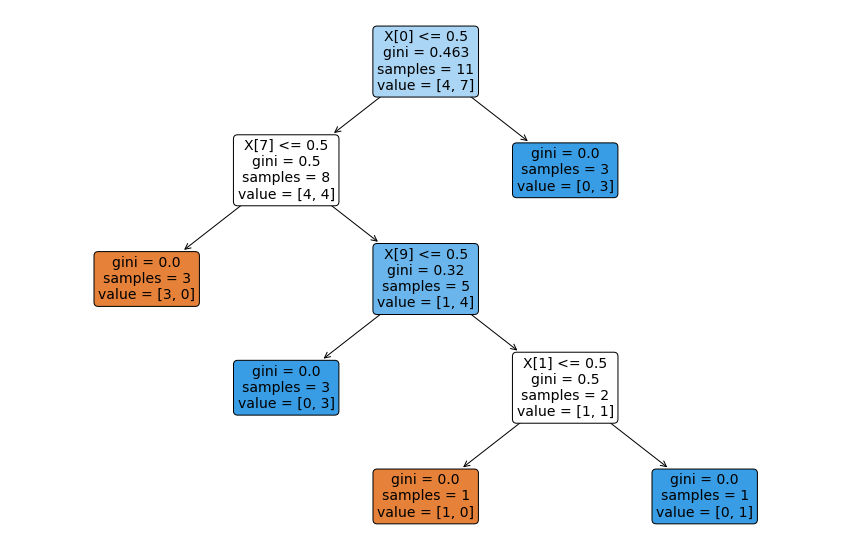

In [ ]:
# Exercise
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

oe = preprocessing.OneHotEncoder()

dataset1 = list(zip(outlook, temperature, humidity, wind))

dataset1 = oe.fit_transform(dataset1).toarray()
target1 = le.fit_transform(play)

data_train, data_test, target_train, target_test = train_test_split(dataset1, target1, test_size = 0.15, random_state = 10)

classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(data_train, target_train)

plt.figure(figsize=(15,10))

a = tree.plot_tree(classifier, rounded = True, filled = True, fontsize=14)

plt.show()




In [ ]:
# Exercise
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

df = load_breast_cancer()

data_train, data_test, target_train, target_test = train_test_split(dataset1, target1, test_size = 0.5, random_state = 10)

classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(data_train, target_train)

plt.figure(figsize=(15,10))

a = tree.plot_tree(classifier, rounded = True, filled = True, fontsize=14)

plt.show()



In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(classifier,out_file='tree_entropy.dot',
feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'], filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))

a = tree.plot_tree(classifier, rounded = True, filled = True, fontsize=14)

plt.show()

In [ ]:
#Iris dataset
from sklearn import preprocessing, tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

X_data = np.array(data.data)
Y_data = np.array(data.target)

model = DecisionTreeClassifier(criterion='gini', random_state=0)
model.fit(X_data, Y_data)

print(data.target_names)
print(data.feature_names)
plt.figure(figsize=(25,10))

a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)

plt.show()

In [ ]:
# Cost Complexity pruning
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

clf = DecisionTreeClassifier(ccp_alpha=0.0125, criterion='gini')

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris

_feature, _label = load_iris(return_X_y=True)
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(_feature, _label, test_size = 0.9, random_state=1)

data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier()

path = model.cost_complexity_pruning_path(trainFeatures, trainLabels)
alphas = path.ccp_alphas

print("\nFor Training Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(trainFeatures, trainLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

print("\nFor Test Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(testFeatures, testLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()